https://stepik.org/lesson/1370093/step/9

In [ ]:
# @title RMSProp
import numpy as np
from numpy import log, log2, exp


# Функции
# логарифмическая функция потерь
loss = lambda w, x, y: log2(1 + exp(-x @ w * y)).mean()

# производная логарифмической функции потерь по вектору w
df = lambda w, x, y: (-(exp(-x @ w * y) * x.T * y) / ((1 + exp(-x @ w * y)) * log(2))).mean(axis=1)

# Данные
data_x = [(5.3, 2.3), (5.7, 2.5), (4.0, 1.0), (5.6, 2.4), (4.5, 1.5), (5.4, 2.3), (4.8, 1.8), (4.5, 1.5), (5.1, 1.5), (6.1, 2.3),
          (5.1, 1.9), (4.0, 1.2), (5.2, 2.0), (3.9, 1.4), (4.2, 1.2), (4.7, 1.5), (4.8, 1.8), (3.6, 1.3), (4.6, 1.4), (4.5, 1.7),
          (3.0, 1.1), (4.3, 1.3), (4.5, 1.3), (5.5, 2.1), (3.5, 1.0), (5.6, 2.2), (4.2, 1.5), (5.8, 1.8), (5.5, 1.8), (5.7, 2.3),
          (6.4, 2.0), (5.0, 1.7), (6.7, 2.0), (4.0, 1.3), (4.4, 1.4), (4.5, 1.5), (5.6, 2.4), (5.8, 1.6), (4.6, 1.3), (4.1, 1.3),
          (5.1, 2.3), (5.2, 2.3), (5.6, 1.4), (5.1, 1.8), (4.9, 1.5), (6.7, 2.2), (4.4, 1.3), (3.9, 1.1), (6.3, 1.8), (6.0, 1.8),
          (4.5, 1.6), (6.6, 2.1), (4.1, 1.3), (4.5, 1.5), (6.1, 2.5), (4.1, 1.0), (4.4, 1.2), (5.4, 2.1), (5.0, 1.5), (5.0, 2.0),
          (4.9, 1.5), (5.9, 2.1), (4.3, 1.3), (4.0, 1.3), (4.9, 2.0), (4.9, 1.8), (4.0, 1.3), (5.5, 1.8), (3.7, 1.0), (6.9, 2.3),
          (5.7, 2.1), (5.3, 1.9), (4.4, 1.4), (5.6, 1.8), (3.3, 1.0), (4.8, 1.8), (6.0, 2.5), (5.9, 2.3), (4.9, 1.8), (3.3, 1.0),
          (3.9, 1.2), (5.6, 2.1), (5.8, 2.2), (3.8, 1.1), (3.5, 1.0), (4.5, 1.5), (5.1, 1.9), (4.7, 1.4), (5.1, 1.6), (5.1, 2.0),
          (4.8, 1.4), (5.0, 1.9), (5.1, 2.4), (4.6, 1.5), (6.1, 1.9), (4.7, 1.6), (4.7, 1.4), (4.7, 1.2), (4.2, 1.3), (4.2, 1.3)]
data_y = [1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, -1,
          -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1,
          -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1, -1, -1, -1]

x_train = np.array([[1, x[0], x[1]] for x in data_x])
y_train = np.array(data_y)

# Параметры
n_train = len(x_train)  # размер обучающей выборки
w = [0.0, 0.0, 0.0]     # начальные весовые коэффициенты
nt = np.array([0.1, 0.05, 0.05])  # шаг обучения для каждого параметра w0, w1, w2
lm = 0.01       # лямбда для вычисления скользящего экспоненциального среднего
N = 200         # число итераций алгоритма SGD
batch_size = 10 # размер мини-батча (величина K = 10)
np.random.seed(0)    # генерация одинаковых последовательностей псевдослучайных чисел
alpha = 0.7          # параметр для RMSProp
G = np.zeros(len(w)) # параметр для RMSProp
eps = 0.01           # параметр для RMSProp

Qe = loss(w, x_train, y_train).mean() # начальное значение среднего эмпирического риска
Q_plot = [Qe]                         # для графика

for _ in range(N):
    # создаём мини-батч:
    k = np.random.randint(0, n_train-batch_size-1)
    X_batch = x_train[k:k+batch_size]
    y_batch = y_train[k:k+batch_size]
    # RMSProp-градиентный шаг
    Qe += lm * (loss(w, X_batch, y_batch) - Qe)        # обновляем качество
    Q_plot.append(Qe)                                  # для графика
    gradient = df(w, X_batch, y_batch)
    G = alpha * G + (1 - alpha) * gradient**2 # сглаженное среднее квадратов градиентов
    w -= nt * gradient / (G**0.5 + eps)   # обновляем веса



Q = (x_train @ w * y_train < 0).mean() # итоговое качество с итоговыми весами


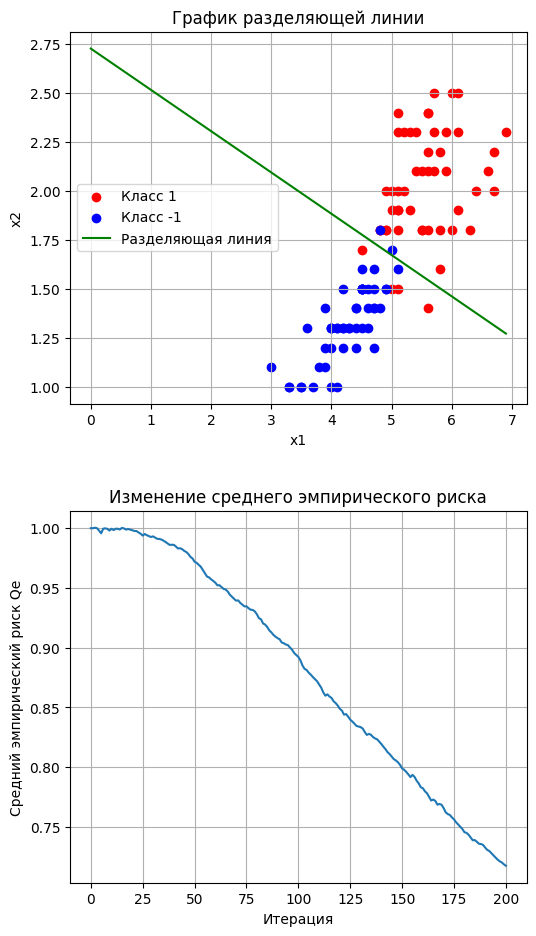

In [ ]:
import matplotlib.pyplot as plt

# Формирование графика разделяющей линии
line_x = np.linspace(0, max(x_train[:, 1]), num=100)
line_y = -w[1] / w[2] * line_x - w[0] / w[2]

# Формирование точек для классов
x_0 = x_train[y_train == 1]
x_1 = x_train[y_train == -1]

# Построение графиков
fig, axs = plt.subplots(2, 1, figsize=(6, 10)) # создание двух подграфиков

# График разделяющей линии
axs[0].scatter(x_0[:, 1], x_0[:, 2], color='red', label='Класс 1')
axs[0].scatter(x_1[:, 1], x_1[:, 2], color='blue', label='Класс -1')
axs[0].plot(line_x, line_y, color='green', label='Разделяющая линия')
axs[0].axis('auto')
axs[0].set_ylabel("x2")
axs[0].set_xlabel("x1")
axs[0].grid(True)
axs[0].legend()
axs[0].set_title("График разделяющей линии")

# График изменения Qe
axs[1].plot(Q_plot)
axs[1].set_xlabel("Итерация")
axs[1].set_ylabel("Средний эмпирический риск Qe")
axs[1].set_title("Изменение среднего эмпирического риска")
axs[1].grid(True)

plt.tight_layout(pad=3.0) # настройка отступов между подграфиками
plt.show()